### Billboard Effect

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [ ]:
billboard = pd.read_csv("/billboard_impact.csv")

In [ ]:
billboard

,month,deposits,aver_inc,population,manprop,billboard,numofbank
0,4,42,5239,9451,42,1,18
1,1,0,5705,9984,42,1,17
2,5,52,4391,12065,60,1,18
3,3,119,6105,14481,43,1,20
4,2,21,5820,19937,40,1,8
...,...,...,...,...,...,...,...
4595,10,195,3806,17869,47,0,6
4596,8,231,3734,16106,43,0,18
4597,10,270,4172,5748,48,0,7
4598,9,343,4505,12290,44,0,7


In [ ]:
billboard['after'] = billboard['month'] >= 7

In [ ]:
result = smf.ols("deposits ~ after * billboard + aver_inc + numofbank", data = billboard).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               deposits   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     418.9
Date:                Thu, 26 Dec 2024   Prob (F-statistic):               0.00
Time:                        22:14:44   Log-Likelihood:                -26971.
No. Observations:                4600   AIC:                         5.395e+04
Df Residuals:                    4594   BIC:                         5.399e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [ ]:
event_result = smf.ols("deposits ~ C(month) * billboard + aver_inc + numofbank", data = billboard).fit()
print(event_result.summary())

                            OLS Regression Results                            
Dep. Variable:               deposits   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     83.74
Date:                Thu, 26 Dec 2024   Prob (F-statistic):               0.00
Time:                        22:18:05   Log-Likelihood:                -26968.
No. Observations:                4600   AIC:                         5.399e+04
Df Residuals:                    4574   BIC:                         5.416e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

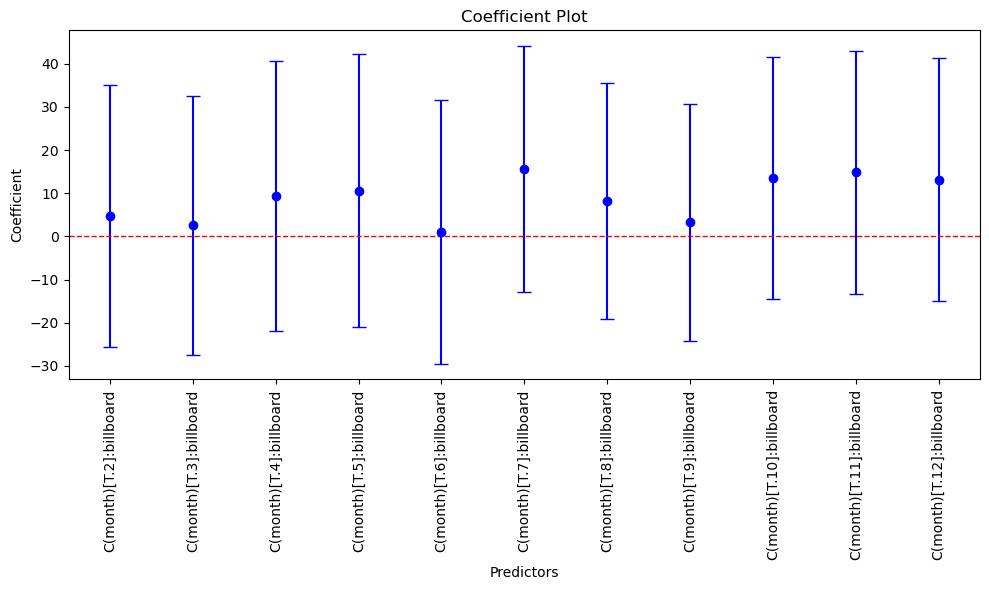

In [ ]:
coeffs = pd.DataFrame({
    "coef": event_result.params[13:24],
    "lower_ci": event_result.conf_int()[13:24][0],
    "upper_ci": event_result.conf_int()[13:24][1]
})

plt.figure(figsize=(10, 6))
plt.errorbar(
    coeffs.index, coeffs["coef"], 
    yerr=[coeffs["coef"] - coeffs["lower_ci"], coeffs["upper_ci"] - coeffs["coef"]],
    fmt='o', capsize=5, color='blue'
)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.xticks(rotation=90)
plt.title("Coefficient Plot")
plt.xlabel("Predictors")
plt.ylabel("Coefficient")
plt.tight_layout()
plt.show()